<a href="https://colab.research.google.com/github/j-claudinei-f/j-claudinei-f/blob/main/Runge_Kutta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução às equações diferencias ordinárias:**

**Métodos de Runge Kutta e derivação numérica**


 *José Claudinei Ferrreira*

 *Universidade Federal de Alfenas (UNIFAL-MG)*

[Link](https://github.com/j-claudinei-f/j-claudinei-f/blob/main/DerivadaNumerica_Runge_Kutta.ipynb) sobre teoria.

#**Exemplo 1**

Considere a equação diferencial ordinária
$$\begin{cases}u'(t)&=&u(t)\\u(0)=1
\end{cases},$$ que sabemos a solução, ou seja, que $$u(t)=e^t.$$

Vamos usar esta equação para testar a diferença entre os métodos.

**i)** Método de Euler, para calcular $u(1)$ aproximadamente. Vamos tomar o passo $h=1/n$, para algum $n$ númeroo natural.

In [13]:
n=10
h=1/n

t0=0
u0=1

def F(t,u): # u'=F(t,u) equação diferencial
  return u

def Euler(v0,F):
  t=[t0]
  v=[v0]  # v0 é a condição inicial
  for i in range(0,n):
    v.append(v[i]+h*F(t[i],v[i]))
    t.append(t[i]+h)
  return [t,v]

t,u=Euler(u0,F)
print('t=',t)
print('\n u=',u)

t= [0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999]

 u= [1, 1.1, 1.2100000000000002, 1.3310000000000002, 1.4641000000000002, 1.61051, 1.7715610000000002, 1.9487171, 2.1435888100000002, 2.357947691, 2.5937424601]


Observando o gráfico de $u(t)=e^t$ e das aproximações.

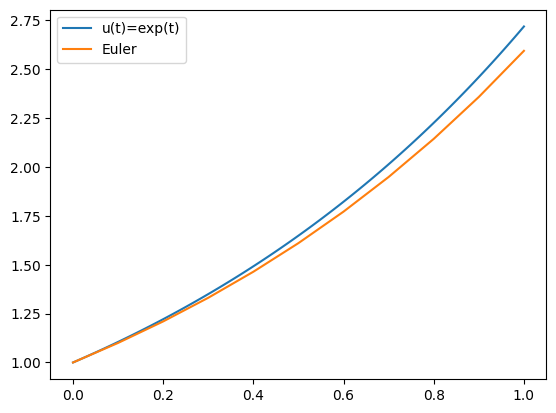

In [14]:
import matplotlib.pyplot as plt
import numpy as np

s=np.linspace(0,1,100)
y=np.exp(s)

plt.plot(s,y,label='u(t)=exp(t)')
plt.plot(t,u,label='Euler')
plt.legend()
plt.show()

**ii)** Método de Runge-Kutta de ordem 2, para calcular $u(1)$ aproximadamente. Vamos tomar o passo $h=1/n$, para algum $n$ númeroo natural.

Por exemplo, tomando
\begin{eqnarray*}
	x_p&=&t_0+ph\\
	k_1&=&F(x_p,y_p)\\
	k_2&=&F(x_p+h,y_p+hk_1)\end{eqnarray*}
obtemos um método dado por $$	y(x_p+h)\,\approx\,y_{p+1}=y_p+\frac{h}{2}\left(k_1+k_2\right),$$ para $p=1,\,2,\,\ldots n-1$. Esse método é conhecido como **método de Euler melhorado**.

In [16]:
def RK2(v0,F):
  t=[t0]
  v=[v0]  # v0 é a condição inicial
  for i in range(0,n):
    k1=F(t[i],v[i])
    k2=F(t[i]+h,v[i]+h*k1)
    v.append(v[i]+h*(k1+k2)/2)
    t.append(t[i]+h)
  return [t,v]

tr,ur=RK2(u0,F)
print('t=',tr)
print('\n u=',ur)

t= [0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999]

 u= [1, 1.105, 1.221025, 1.349232625, 1.490902050625, 1.647446765940625, 1.8204286763643904, 2.0115736873826515, 2.22278892455783, 2.456181761636402, 2.714080846608224]


Gráficamente temos:

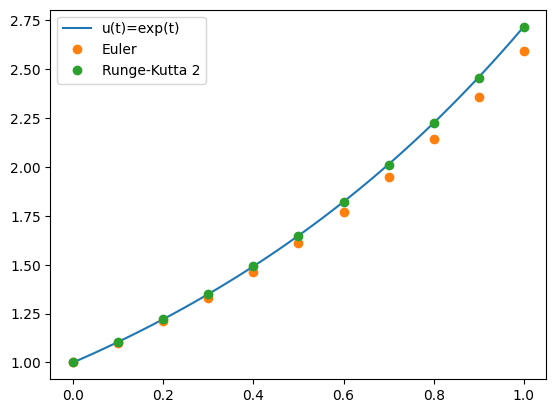

In [18]:
plt.plot(s,y,label='u(t)=exp(t)')
plt.plot(t,u,'o',label='Euler')
plt.plot(tr,ur,'o',label='Runge-Kutta 2')
plt.legend()
plt.show()

**ii)** Método de Runge-Kutta de ordem 4, para calcular $u(1)$ aproximadamente. Vamos tomar o passo $h=1/n$, para algum $n$ númeroo natural.

Um método de Runge-Kutta de ordem 4 é dado por
\begin{eqnarray*}
	x_p&=&t_0+ph\\
	k_1&=&F(x_p,y_p)\\
	k_2&=&F(x_p+h/3,y_p+hk_1/3)\\
	k_3&=&F(x_p+2h/3,y_p-hk_1/3+hk_2)\\
	k_4&=&F(x_p+h,y_p+hk_1-hk_2+hk_3)\\
	y(x_p+h)\,\approx\,y_{p+1}&=&y_p+\frac{h}{8}\left(k_1+3(k_2+k_3)+k_4\right)
\end{eqnarray*}



In [21]:
n=4
h=1/n

def RK4(v0,F):
  t=[t0]
  v=[v0]  # v0 é a condição inicial
  for i in range(0,n):
    k1=F(t[i],v[i])
    k2=F(t[i]+h/3,v[i]+h*k1/3)
    k3=F(t[i]+2*h/3,v[i]-h*k1/3+h*k2)
    k4=F(t[i]+h,v[i]+h*k1-h*k2+h*k3)
    v.append(v[i]+h*(k1+3*(k2+k3)+k4)/8)
    t.append(t[i]+h)
  return [t,v]

tr4,ur4=RK4(u0,F)
print('t=',tr4)
print('\n u=',ur4)

t= [0, 0.25, 0.5, 0.75, 1.0]

 u= [1, 1.2840169270833333, 1.648699469036526, 2.1169580259162033, 2.718209939201323]


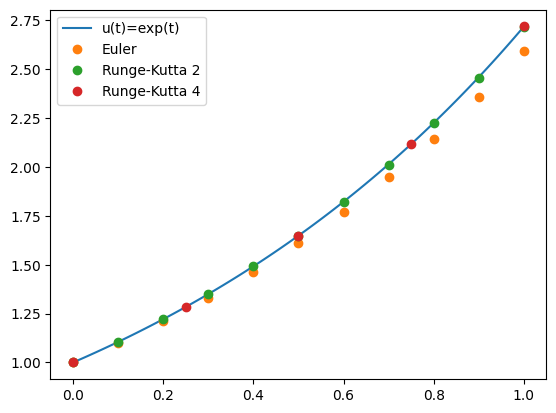

In [22]:
plt.plot(s,y,label='u(t)=exp(t)')
plt.plot(t,u,'o',label='Euler')
plt.plot(tr,ur,'o',label='Runge-Kutta 2')
plt.plot(tr4,ur4,'o',label='Runge-Kutta 4')
plt.legend()
plt.show()

Vemos graficamente que as aproximações melhoram quando a ordem do método aumenta. Mas os cálculos envolvidos em cada iteração aumentam também.